In [1]:
PATH = "/media/maxine/c8f4bcb2-c1fe-4676-877d-8e476418f5e5/0-RPE-cell-timelapse/"
from modules.learning.models import *
from modules.learning.train import train_model
from modules.utils import hc
from modules.visualize import plot_loss, plot_normalized_time_error

# from modules.learning.evaluate import Evaluation, get_latent_space, plot_umap
from matplotlib import pyplot as plt
from modules.learning.dycep import DYCEP
import json

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# enet = EfficientNet()


track_path = PATH + "track_datasets/control_mm/train/images/"
label_path = PATH + "track_datasets/control_mm/train/labels/"

in_channels = [1]

# training mamba model

anormal span detected
tensor([-0.0106], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5088, 0.4982]], device='cuda:0', grad_fn=<SqueezeBackward1>)
min max
[0.7677046 0.9768793] [0.7805691 0.984489 ]
3.30M Parameters


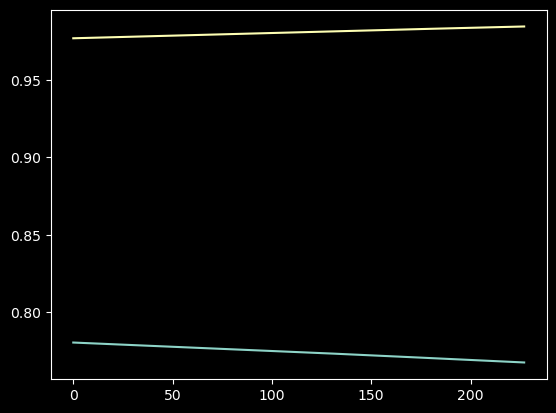

In [2]:
model = DYCEP(cnn_in_channels=len(in_channels))
model.to(DEVICE)

#########
# test on one track
#########

track_name = "0607.1629.npy"
# getting one sequence to check the model
imgs = torch.tensor(
    np.load(track_path + track_name, allow_pickle=True),
    dtype=torch.float32,
)[:, in_channels, :, :]


label = torch.tensor(
    np.load(label_path + track_name).reshape(2, -1).T,
    dtype=torch.float32,
)

imgs, label = imgs.to(DEVICE), label.to(DEVICE)

zz = model.forward(imgs[None, :, :, :])
zz = zz.detach().cpu().numpy().squeeze()
plt.plot(zz)
print("min max")
print(zz.min(0), zz.max(0))
print(hc(model), "Parameters")

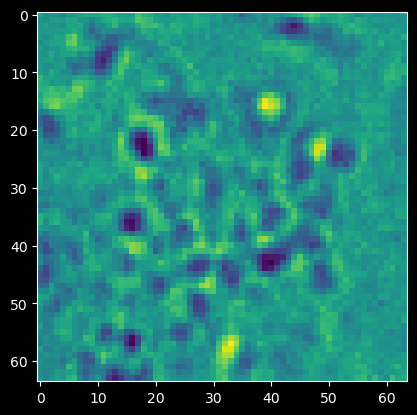

In [3]:
imgs.shape
imgs = torch.tensor(
    np.load(track_path + track_name, allow_pickle=True),
    dtype=torch.float32,
)[:, :, :, :]

plt.imshow(imgs[10, 1, :, :].detach().cpu().numpy())

In [4]:
train_model(
    directory=PATH + "track_datasets/control_mm/",
    model=model,
    # pass [1] for only BF channel, or [1,1,1] for 3 times the same channel
    # or [0,1,2] for all channels
    img_channels=in_channels,
    batch_size=1,
    learning_rate=1e-5,
    slice_p=0.5,
    slice_len=20,
    random_len=True,
    name="DYCEP",
    num_epochs=20,
)

Epoch 1/20


  0%|          | 0/5188 [00:00<?, ?it/s]

anormal span detected
tensor([-0.0106], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5088, 0.4982]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 1/5188 [00:00<28:42,  3.01it/s]

anormal span detected
tensor([-0.0107], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5094, 0.4987]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 2/5188 [00:00<20:04,  4.31it/s]

anormal span detected
tensor([-0.0109], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5101, 0.4992]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 6/5188 [00:00<07:33, 11.44it/s]

anormal span detected
tensor([-0.0110], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5108, 0.4998]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0108], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5110, 0.5002]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0108], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5117, 0.5009]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0105], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5120, 0.5015]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 8/5188 [00:00<06:15, 13.80it/s]

anormal span detected
tensor([-0.0101], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5122, 0.5020]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0098], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5123, 0.5026]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0092], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5123, 0.5031]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 11/5188 [00:00<05:24, 15.93it/s]

anormal span detected
tensor([-0.0086], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5123, 0.5037]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 14/5188 [00:01<04:57, 17.39it/s]

anormal span detected
tensor([-0.0081], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5122, 0.5041]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0074], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5120, 0.5045]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0068], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5119, 0.5051]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0061], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5116, 0.5055]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0054], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5114, 0.5060]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 16/5188 [00:01<04:47, 18.01it/s]

anormal span detected
tensor([-0.0047], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5110, 0.5064]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0040], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5107, 0.5067]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0037], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5105, 0.5067]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 19/5188 [00:01<04:34, 18.86it/s]

anormal span detected
tensor([-0.0026], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5102, 0.5076]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0020], device='cuda:0', grad_fn=<SubBackward0>)


  0%|          | 21/5188 [00:01<04:32, 18.96it/s]

tensor([[0.5099, 0.5079]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0013], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5095, 0.5083]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0005], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5092, 0.5087]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  3%|▎         | 142/5188 [00:07<04:12, 19.97it/s]


'Done!'

# Example to swap temporal encoders

In [9]:
from modules.learning.time_encoders.transformer import SmallTransformerEncoder
from torch import nn

in_channels = [1]

temporal_encoder_dim = 256
temporal_encoder_n_layers = 6

torch_transformer_temporal_encoder = nn.TransformerEncoder(
    nn.TransformerEncoderLayer(
        d_model=temporal_encoder_dim, nhead=8, dim_feedforward=temporal_encoder_dim * 2, batch_first=True
    ),
    num_layers=temporal_encoder_n_layers,
)
transformer_temporal_encoder = SmallTransformerEncoder(
    d_model=temporal_encoder_dim, num_layers=temporal_encoder_n_layers
)

lstm_temporal_encoder = (
    nn.LSTM(temporal_encoder_dim, temporal_encoder_dim, num_layers=6, batch_first=True),
)


In [12]:
model = DYCEP(
    cnn_in_channels=len(in_channels),
    mamba_z_dim=temporal_encoder_dim,
    mamba_n_layers=temporal_encoder_n_layers,
)
model_transformer = DYCEP(
    cnn_in_channels=len(in_channels), temporal_encoder=transformer_temporal_encoder
)

model_torch_transformer = DYCEP(
    cnn_in_channels=len(in_channels), temporal_encoder=torch_transformer_temporal_encoder
)

model_lstm = DYCEP(
    cnn_in_channels=len(in_channels), temporal_encoder=lstm_temporal_encoder
)

In [13]:
from modules.utils import hc

print(f"transformer model has {hc(model_transformer)} parameters")
print(f"lstm model has {hc(model_lstm)} parameters")
print(f"mamba model has {hc(model)} parameters")

transformer model has 5.41M parameters
lstm model has 669.99K parameters
mamba model has 3.30M parameters


In [15]:
train_model(
    directory=PATH + "track_datasets/control_mm/",
    model=model_torch_transformer,
    # pass [1] for only BF channel, or [1,1,1] for 3 times the same channel
    # or [0,1,2] for all channels
    img_channels=in_channels,
    batch_size=1,
    learning_rate=1e-5,
    slice_p=0.,
    slice_len=20,
    random_len=True,
    name="DYCEP",
    num_epochs=5,
)

Epoch 1/5


  0%|          | 4/5188 [00:00<06:29, 13.32it/s]

anormal span detected
tensor([-0.0338], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5227, 0.4889]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0271], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5199, 0.4928]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0201], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5174, 0.4973]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0136], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5148, 0.5012]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0071], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5126, 0.5055]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0011], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5111, 0.5100]], device='cuda:0', grad_fn=<SqueezeBackward1>)


100%|██████████| 358/358 [00:04<00:00, 89.39it/s]


    Train Loss: 0.022, Test Loss: 0.024
    Train R2: 0.699, Test R2: 0.837
Epoch 2/5


100%|██████████| 358/358 [00:03<00:00, 90.48it/s]


    Train Loss: 0.016, Test Loss: 0.023
    Train R2: 0.851, Test R2: 0.861
Epoch 3/5


100%|██████████| 358/358 [00:04<00:00, 89.44it/s]


    Train Loss: 0.015, Test Loss: 0.023
    Train R2: 0.866, Test R2: 0.871
Epoch 4/5


100%|██████████| 358/358 [00:03<00:00, 89.50it/s] 


    Train Loss: 0.012, Test Loss: 0.023
    Train R2: 0.875, Test R2: 0.879
Epoch 5/5


100%|██████████| 358/358 [00:03<00:00, 89.94it/s]

    Train Loss: 0.011, Test Loss: 0.023
    Train R2: 0.883, Test R2: 0.886


'Done!'

In [27]:
model.temporal_encoder.type

# get method name from model.temporal_encode
type(model_torch_transformer.temporal_encoder.__class__.__name__)

str

# Go to result_dycep notebook